__All the Lifecycle In A Data Science Projects__
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

# Exploratory Data Analysis

1. Finding missing values
2. Finding numerical features\
    2.1 Finding temporal variables\
    2.2 Discrete and continous numerical features
3. Distribution of numerical data
4. Finding categorical variables
5. Cardinality(Number of unique categories) in categorical features
6. Finding Outliers
7. Relationship between independent and dependent variables

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset.shape

(1460, 81)

## Finding missing values

In [4]:
'''
Finding all the features with missing values
'''
features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()]

for feature in features_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),"% missing values")

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.0007 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


__Since there are missing values we need to find relation between missing values and dependent variable.__

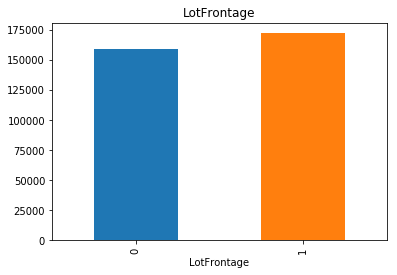

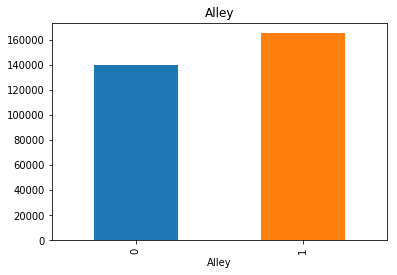

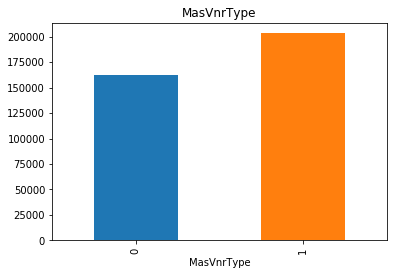

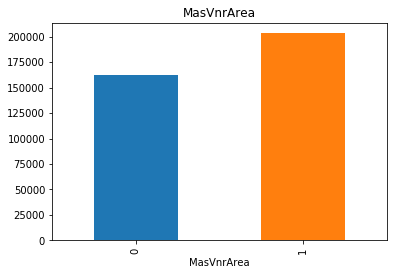

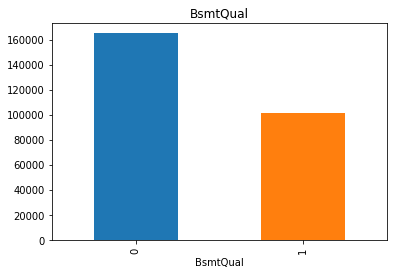

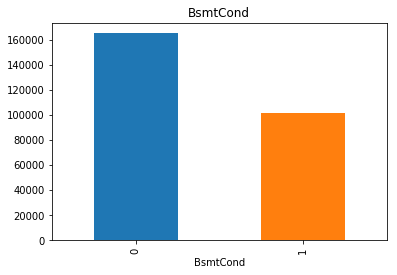

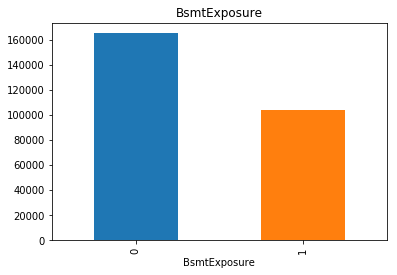

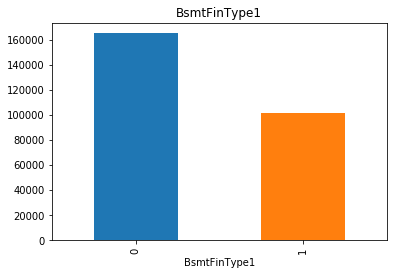

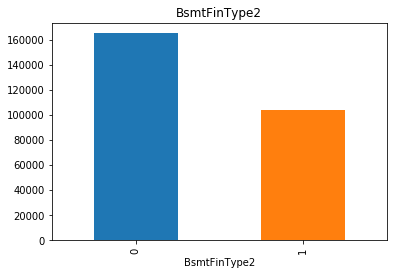

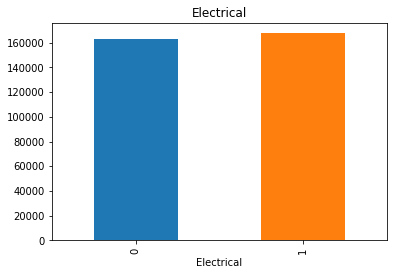

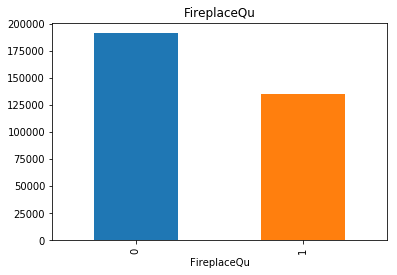

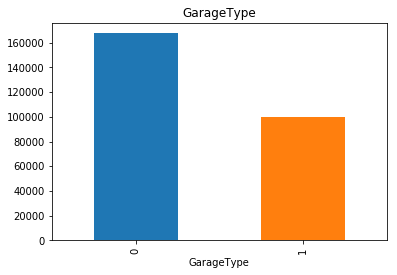

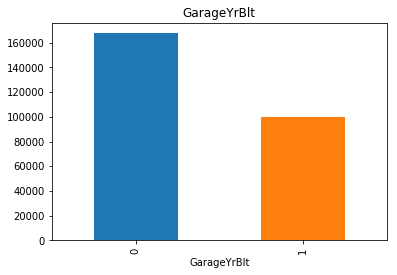

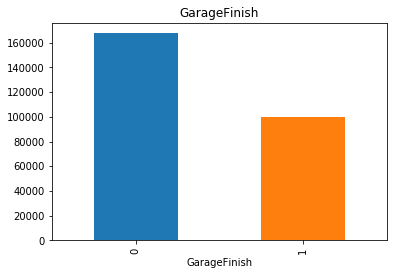

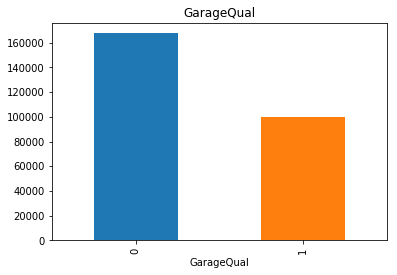

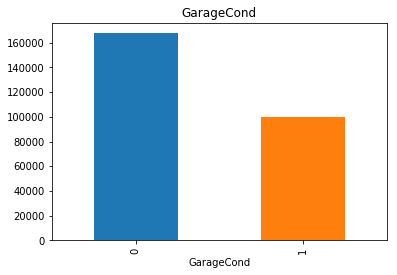

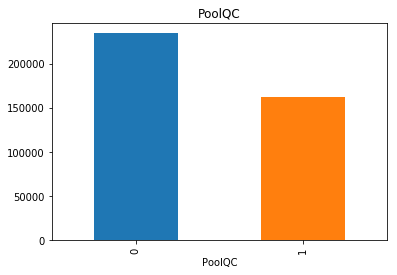

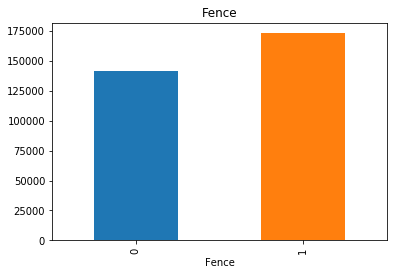

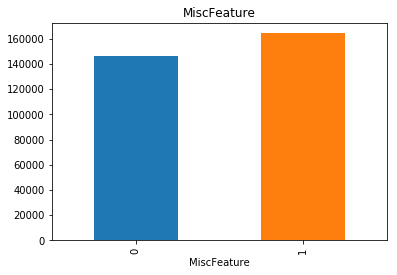

In [5]:
for feature in features_nan:
    data = dataset.copy()
    
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

__As we can see that missing values are having some impact on the SalesPrice, we must fill these missing values with some meaningful data later Feature engineering part.__

## Finding all numerical features

In [6]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print("No of numerical features:{}".format(len(numerical_features)))
dataset[numerical_features].head()

No of numerical features:38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Finding the temporal variables (Datetime variables)

In [7]:
temporal_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
for feature in temporal_features:
    print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

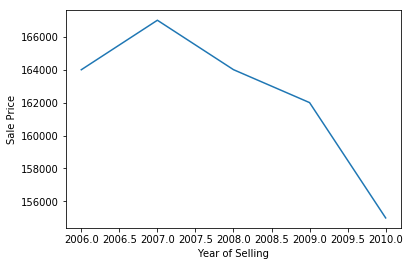

In [9]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year of Selling")
plt.ylabel("Sale Price")
plt.show()

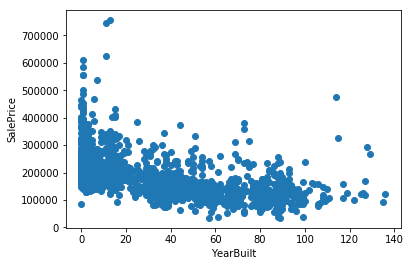

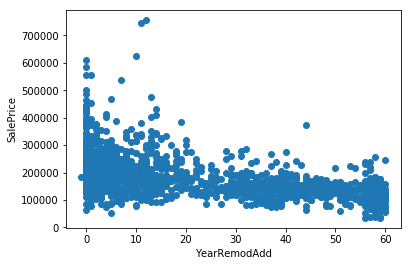

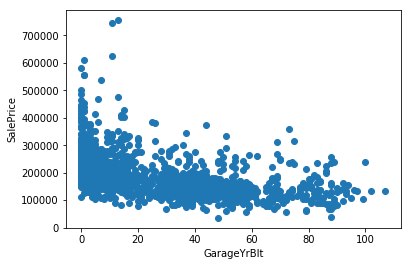

In [10]:
for feature in temporal_features:
    if feature!='YrSold':
        data = dataset.copy()
        data[feature] = data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### Finding discrete and continuous numerical features

In [11]:
# Numerical variables are usually of 2 type
# Continous variable and Discrete Variables

discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in temporal_features+['Id']]
print("Discrete features:{}".format(len(discrete_features)))

Discrete features:17


In [12]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


## Finding Distribution of Numerical features(Discrete and Continuous features)

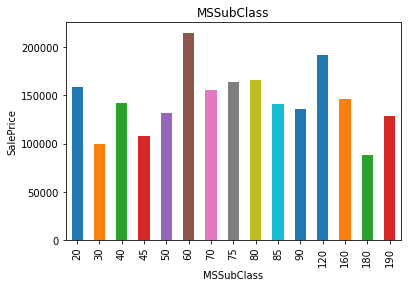

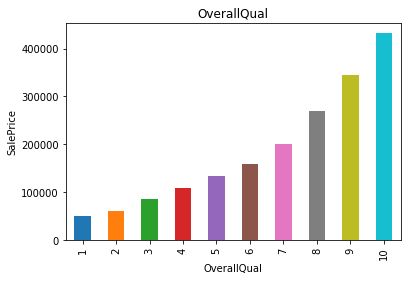

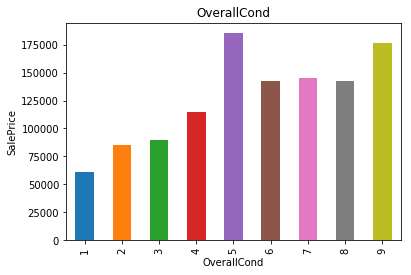

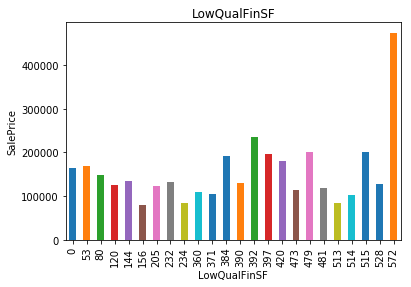

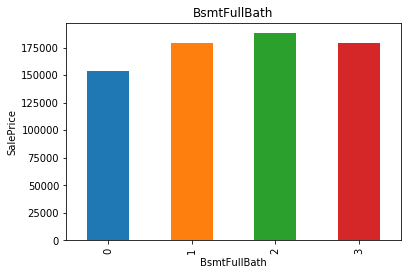

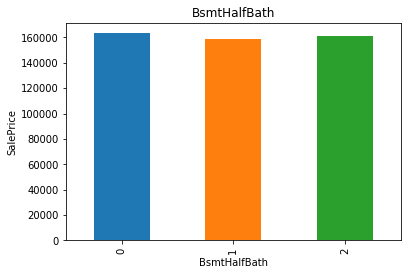

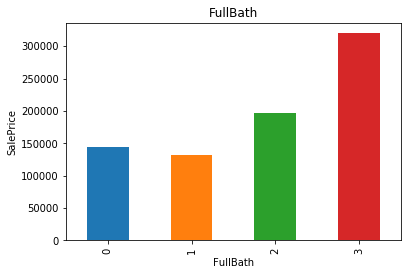

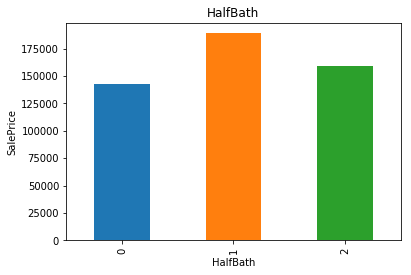

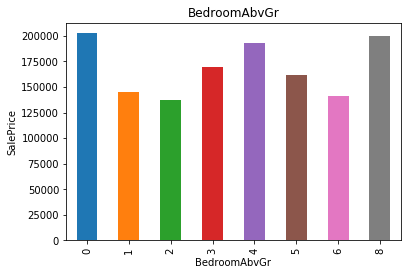

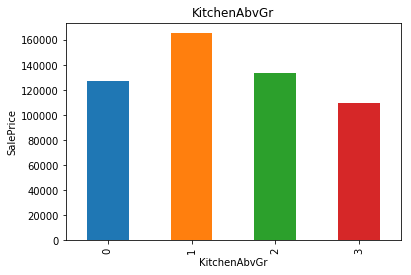

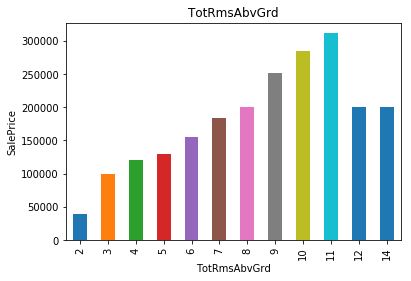

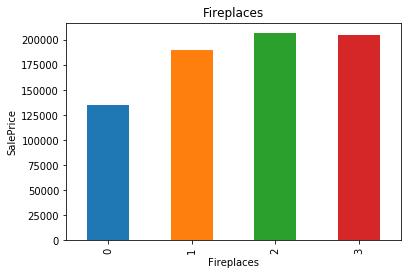

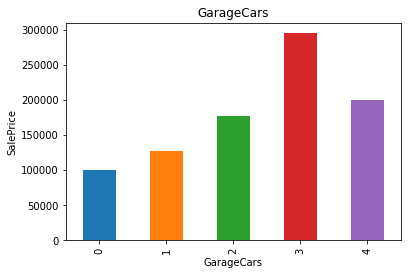

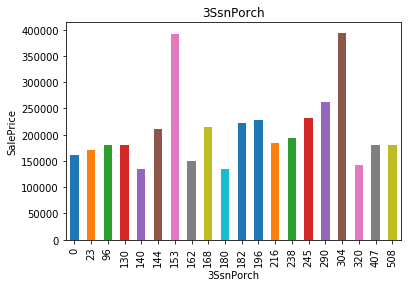

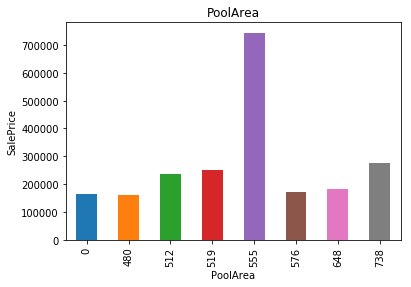

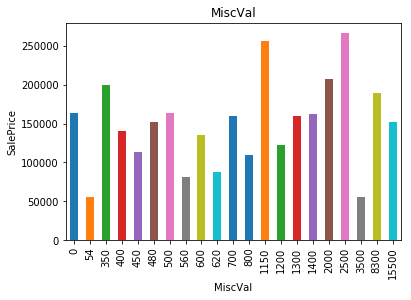

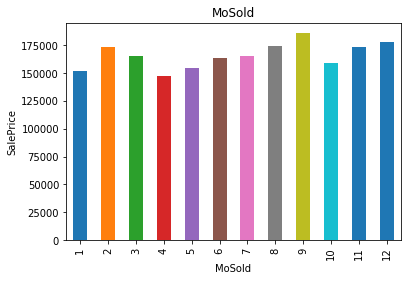

In [14]:
for feature in discrete_features:
    data = dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

__We can see there is relation between discrete numerical features and SalesPrice.__

In [15]:
continuous_features = [feature for feature in numerical_features if feature not in  discrete_features+temporal_features+['Id']]
print("Continuous features:{}".format(len(continuous_features)))

Continuous features:16


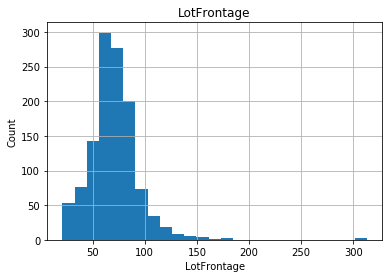

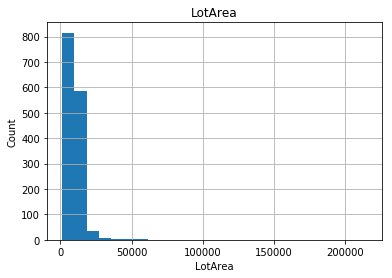

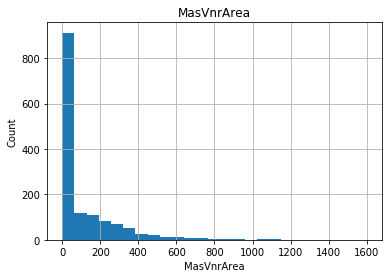

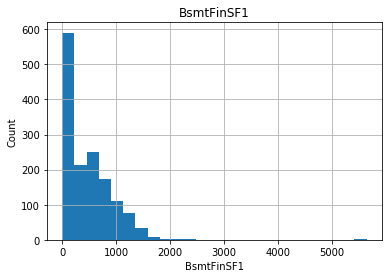

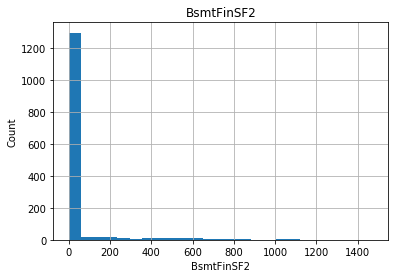

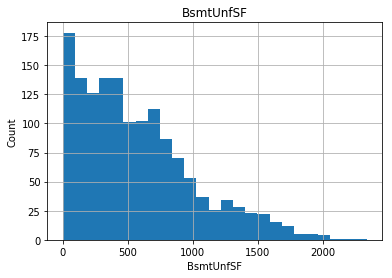

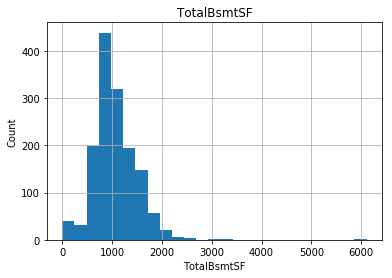

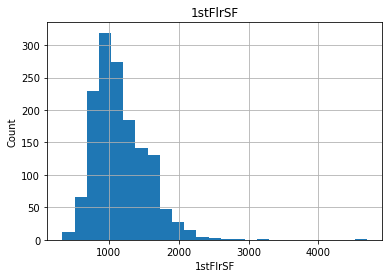

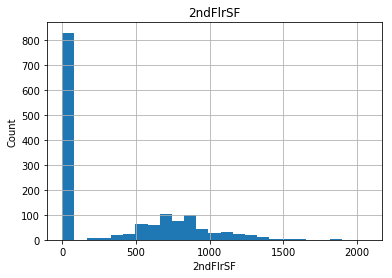

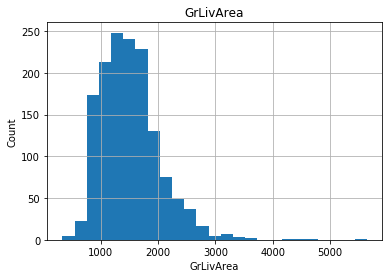

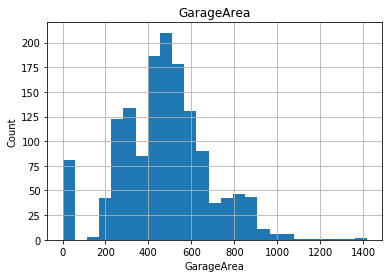

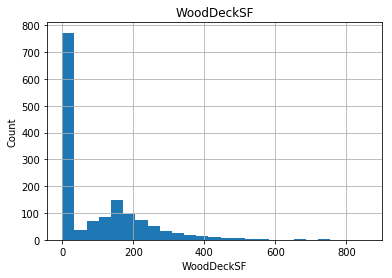

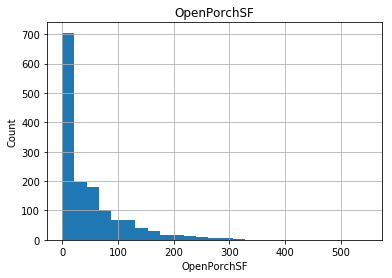

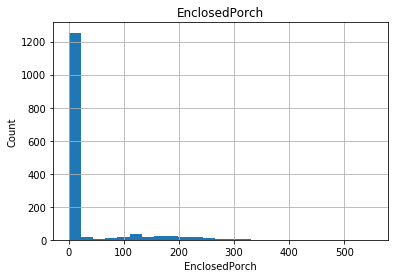

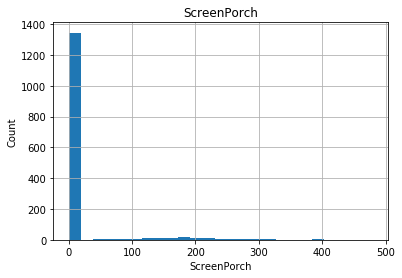

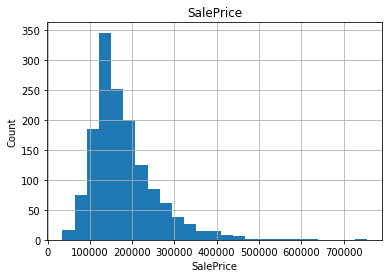

In [16]:
for feature in continuous_features:
    data = dataset.copy()
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Finding outlier in Numerical Features

### Outlier in Discrete features

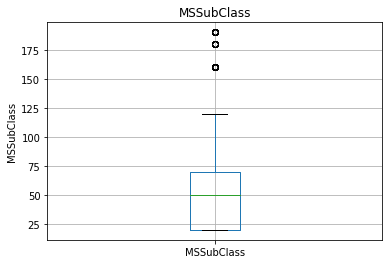

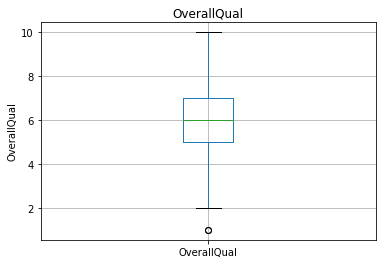

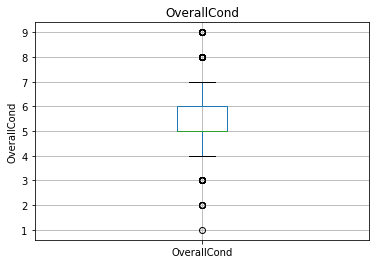

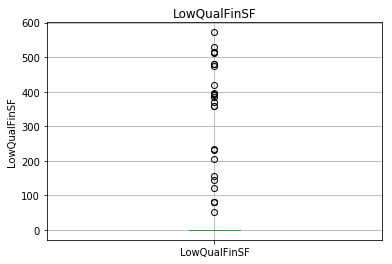

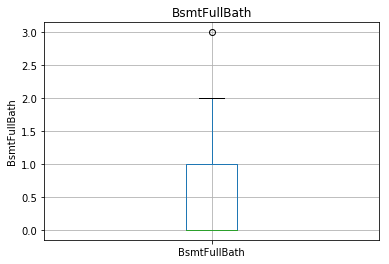

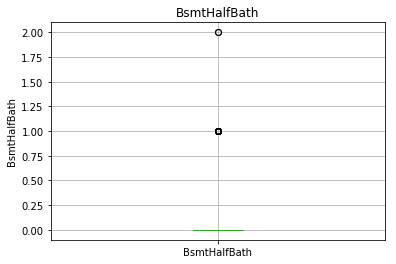

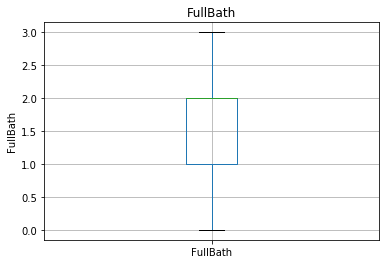

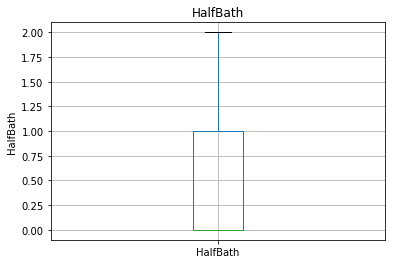

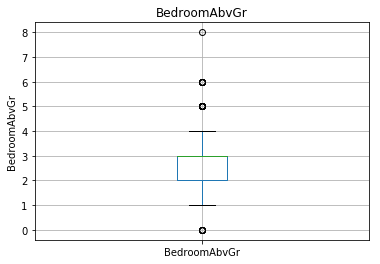

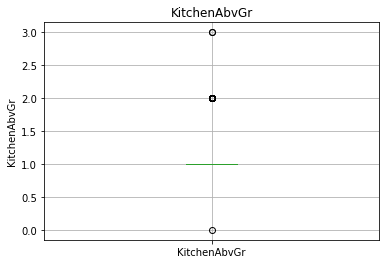

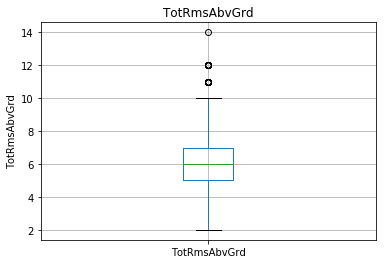

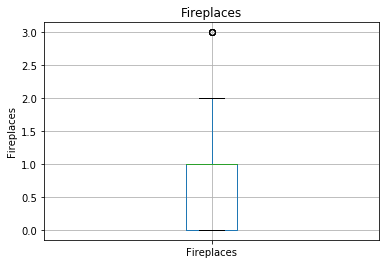

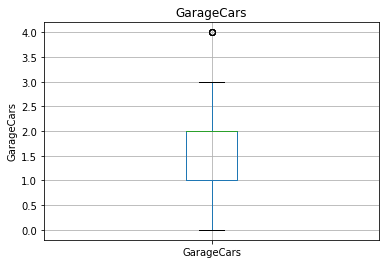

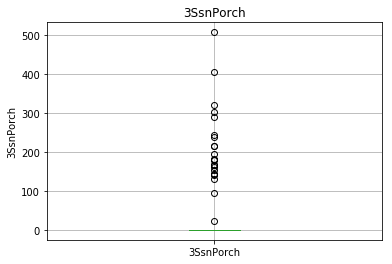

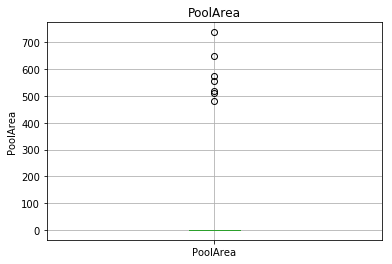

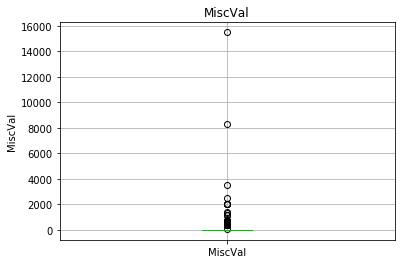

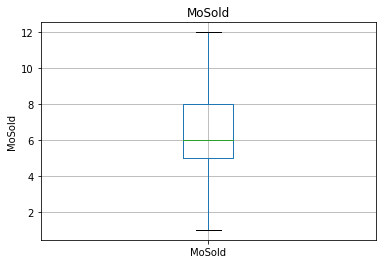

In [41]:
for feature in discrete_features:
    data= dataset.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Outlier in Continuous features (without any transformation)

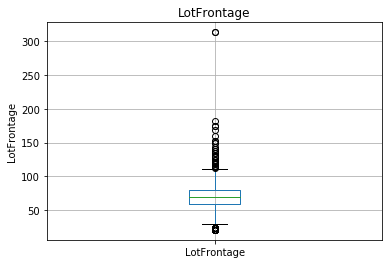

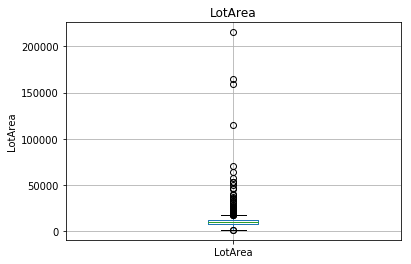

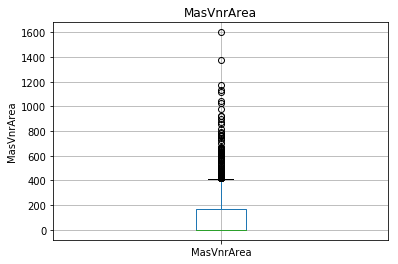

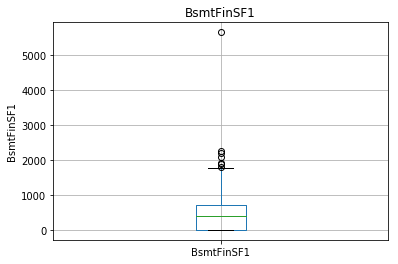

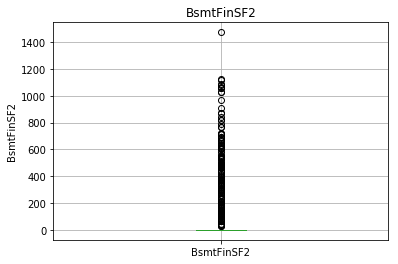

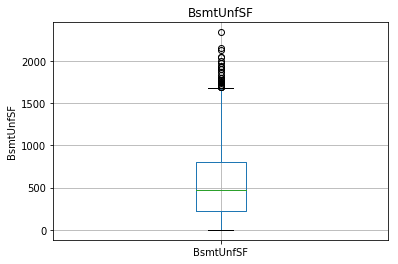

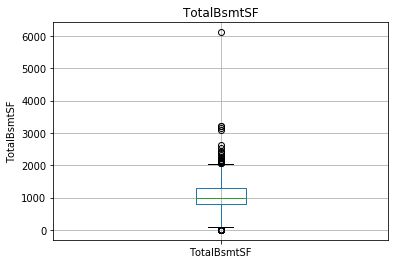

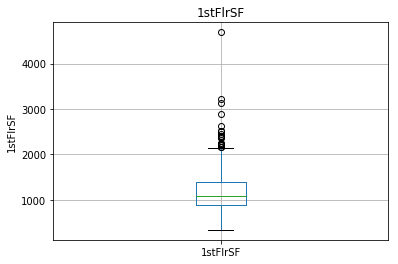

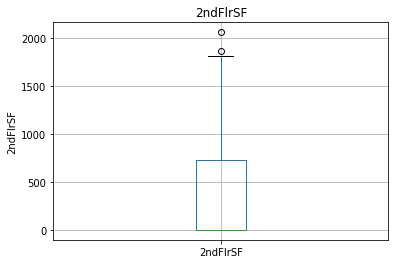

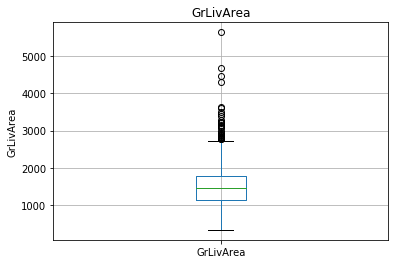

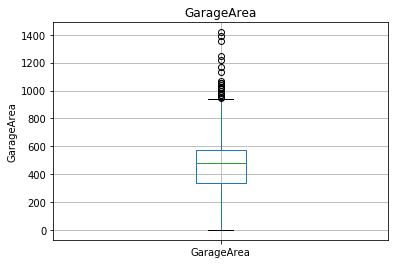

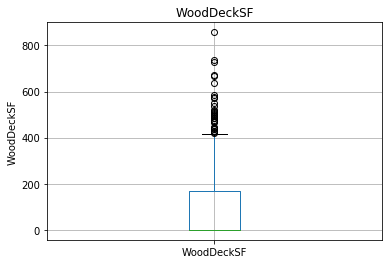

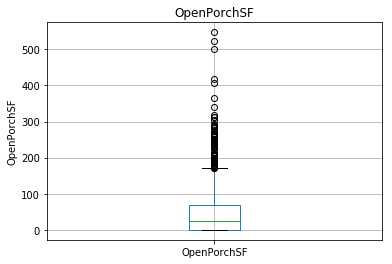

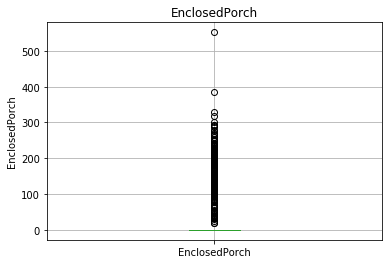

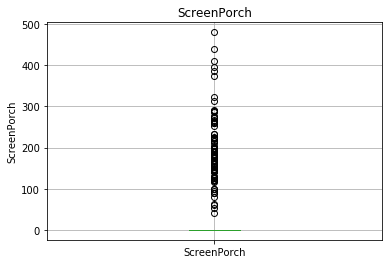

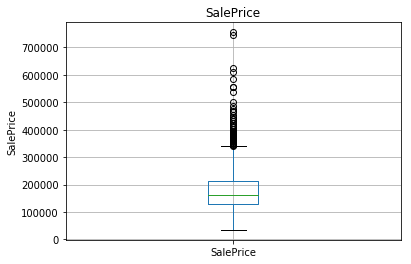

In [42]:
for feature in continuous_features:
    data= dataset.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Outlier in Continuous features (with logarithmic transformation)

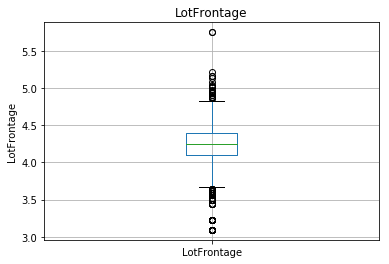

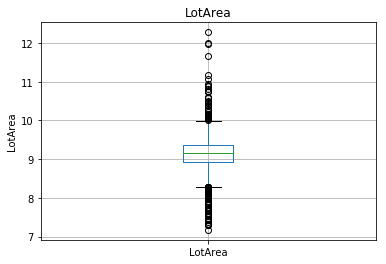

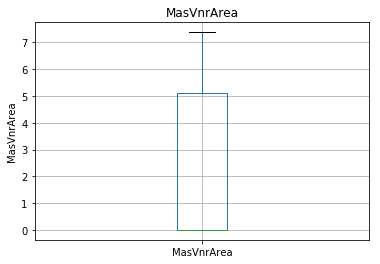

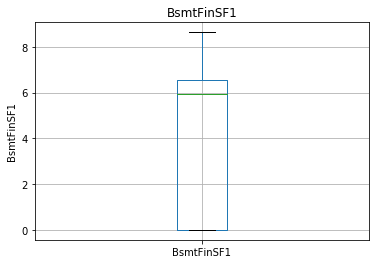

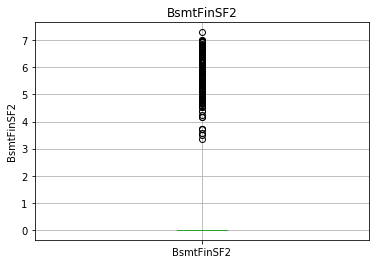

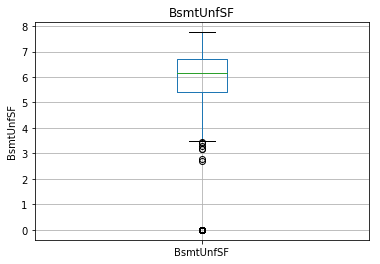

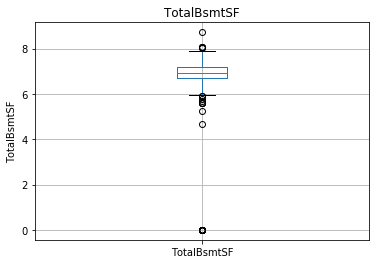

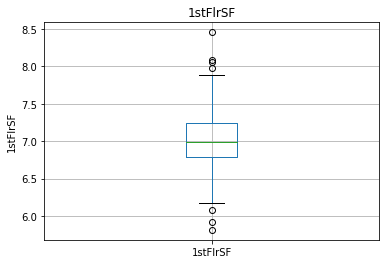

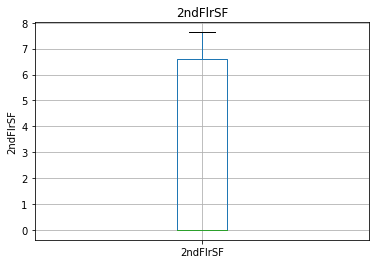

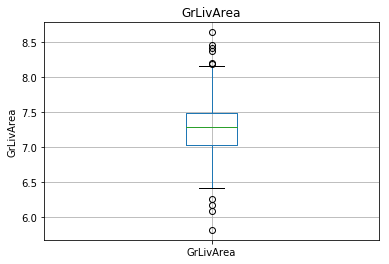

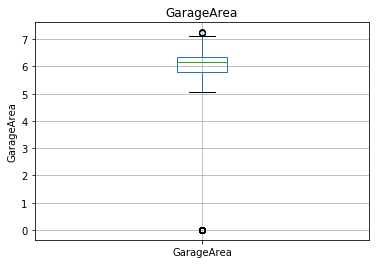

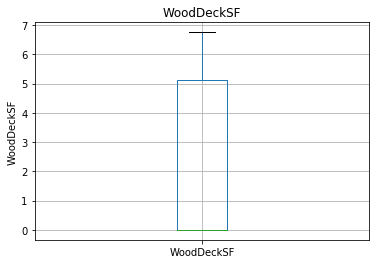

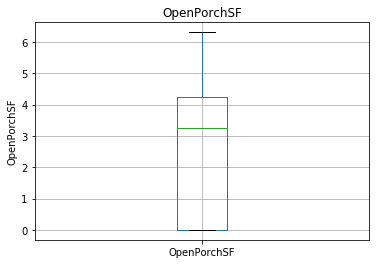

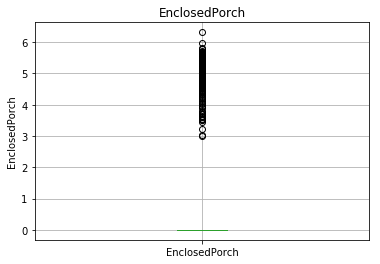

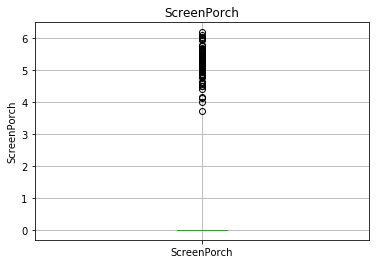

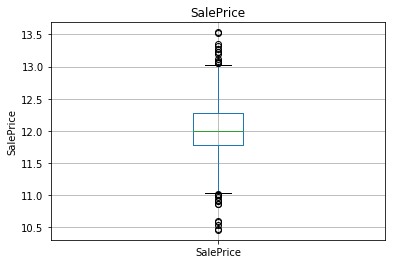

In [46]:
for feature in continuous_features:
    data= dataset.copy()
    
    # log 0 is undefined hence we used +1 to handle this situation
    data[feature]=np.log(data[feature]+1)
    # This is alternative way of handling log 0 condition
    #data[feature]=np.log1p(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Finding Categorical Variables

In [38]:
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtype == 'O' ]
print("{}".format(categorical_feature))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [39]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Cardinality of a categorical feature

In [33]:
for feature in categorical_feature:
    print(feature," : ",len(dataset[feature].unique()))

MSZoning  :  5
Street  :  2
Alley  :  3
LotShape  :  4
LandContour  :  4
Utilities  :  2
LotConfig  :  5
LandSlope  :  3
Neighborhood  :  25
Condition1  :  9
Condition2  :  8
BldgType  :  5
HouseStyle  :  8
RoofStyle  :  6
RoofMatl  :  8
Exterior1st  :  15
Exterior2nd  :  16
MasVnrType  :  5
ExterQual  :  4
ExterCond  :  5
Foundation  :  6
BsmtQual  :  5
BsmtCond  :  5
BsmtExposure  :  5
BsmtFinType1  :  7
BsmtFinType2  :  7
Heating  :  6
HeatingQC  :  5
CentralAir  :  2
Electrical  :  6
KitchenQual  :  4
Functional  :  7
FireplaceQu  :  6
GarageType  :  7
GarageFinish  :  4
GarageQual  :  6
GarageCond  :  6
PavedDrive  :  3
PoolQC  :  4
Fence  :  5
MiscFeature  :  5
SaleType  :  9
SaleCondition  :  6


## Finding relation between categorical variable and dependent variable

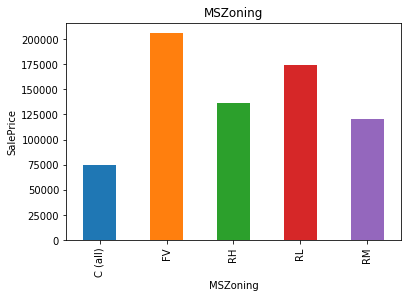

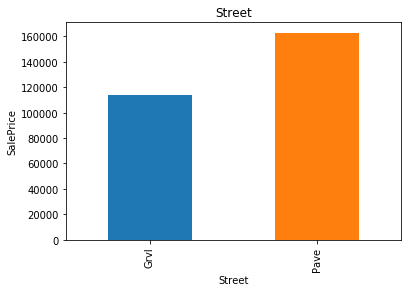

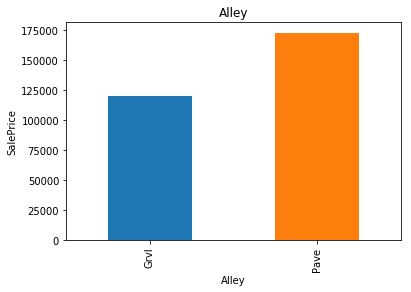

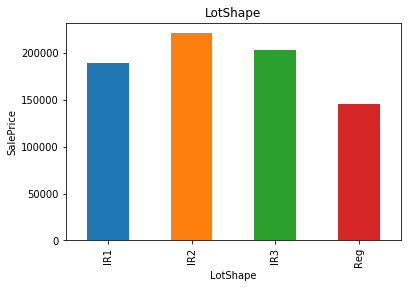

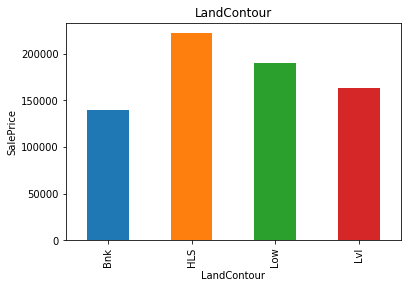

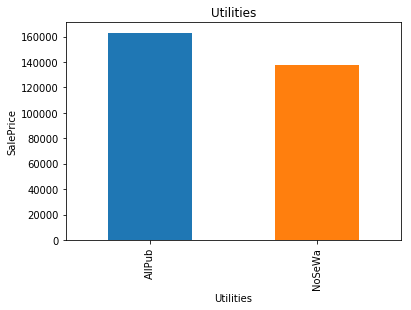

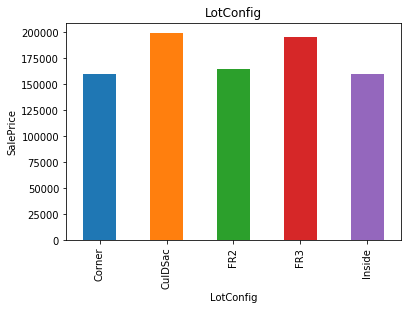

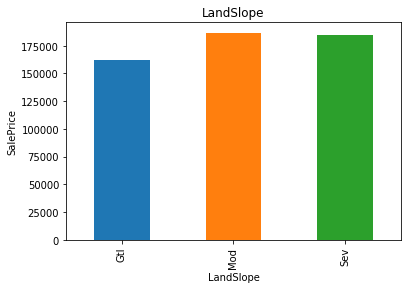

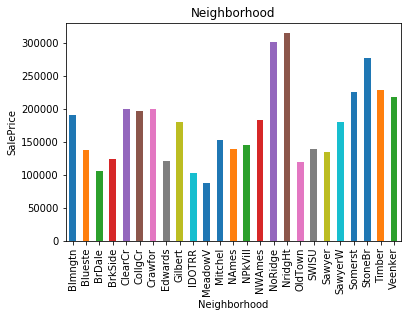

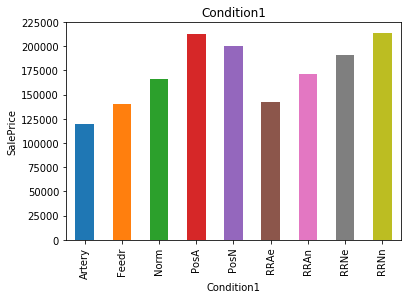

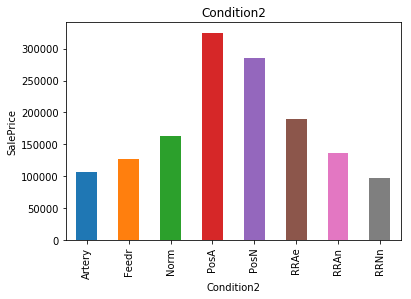

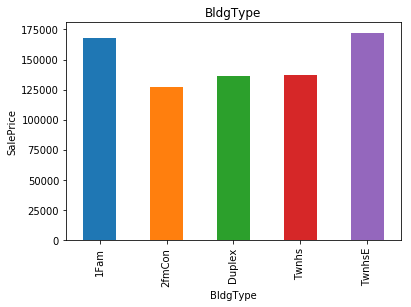

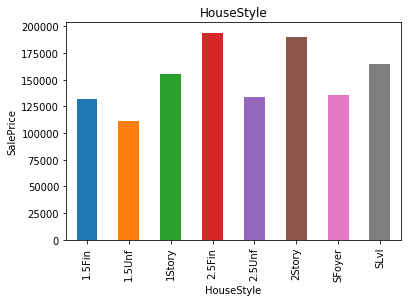

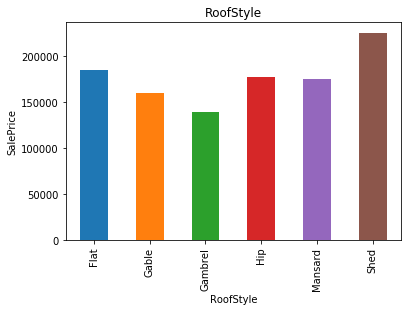

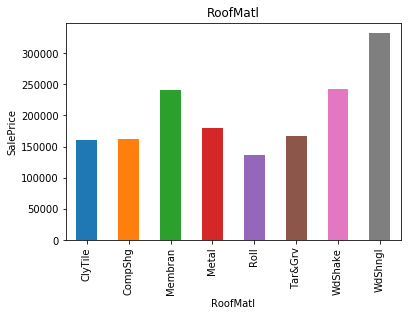

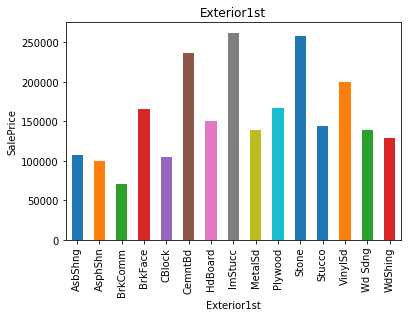

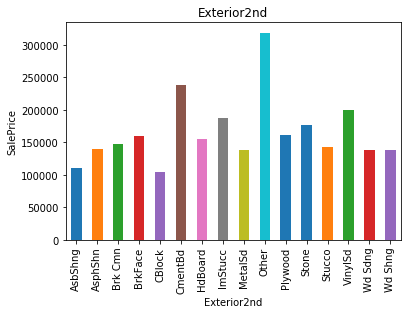

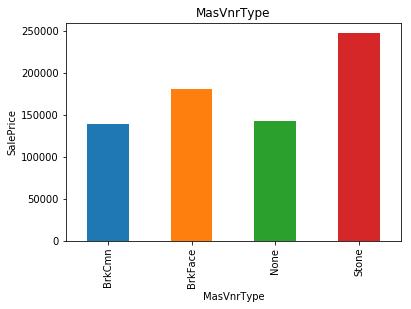

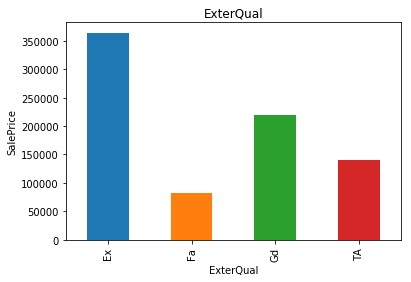

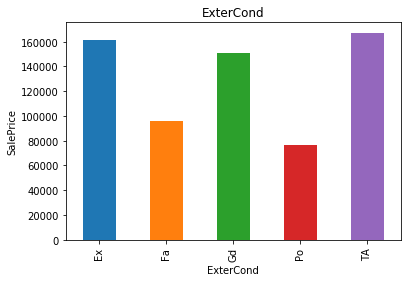

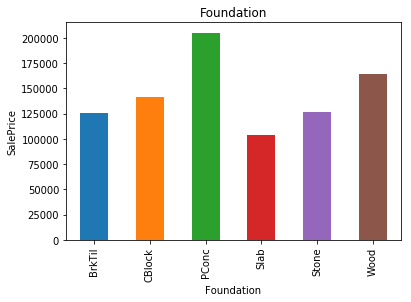

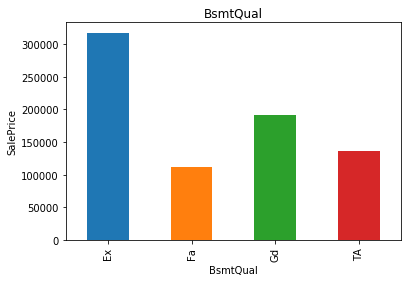

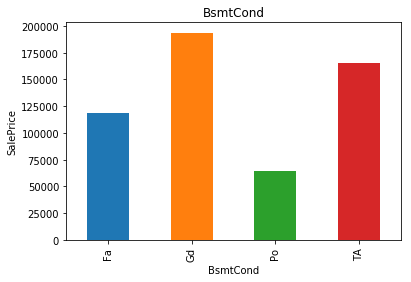

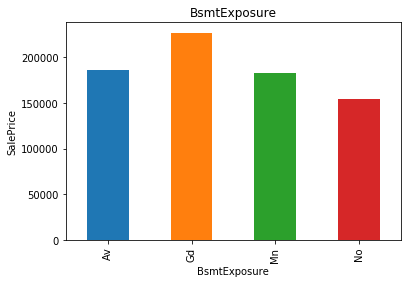

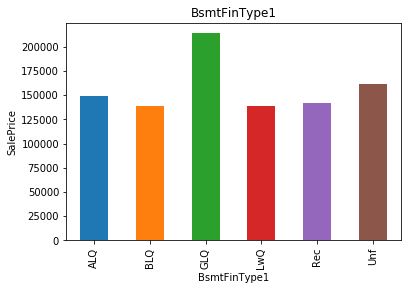

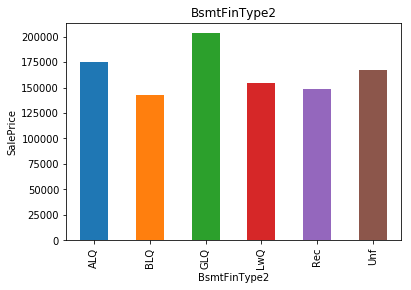

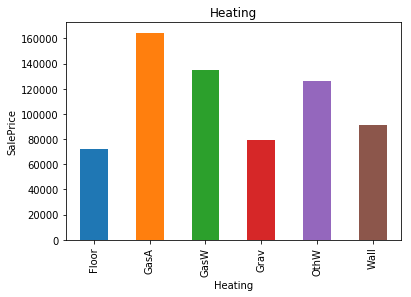

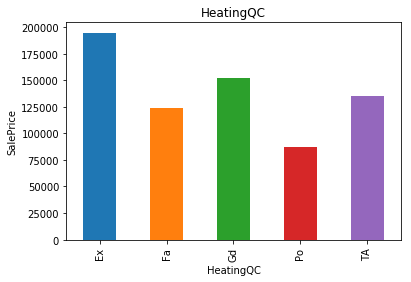

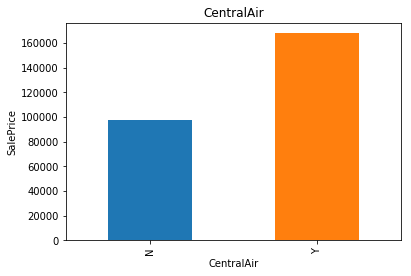

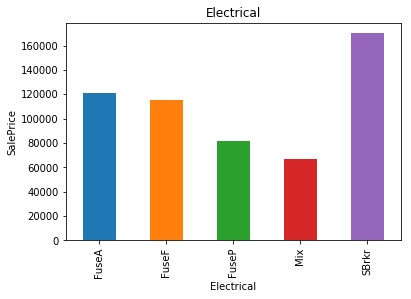

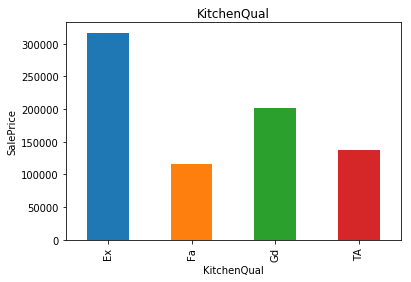

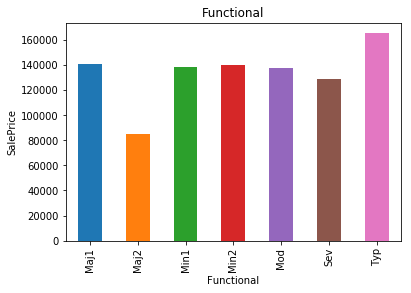

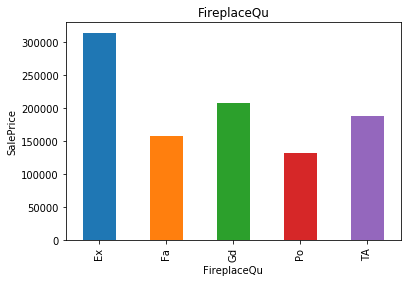

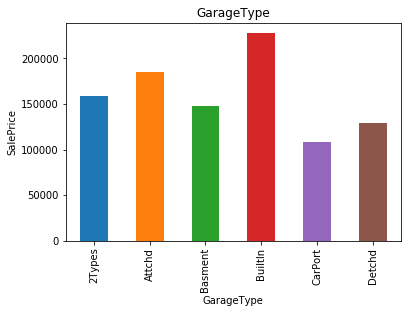

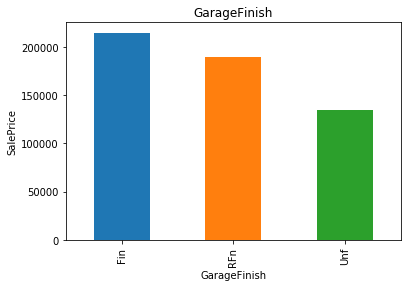

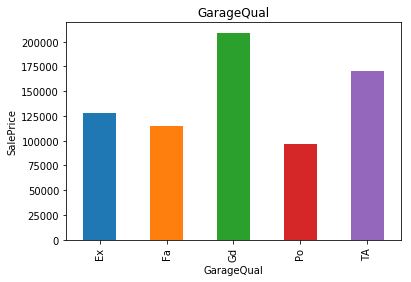

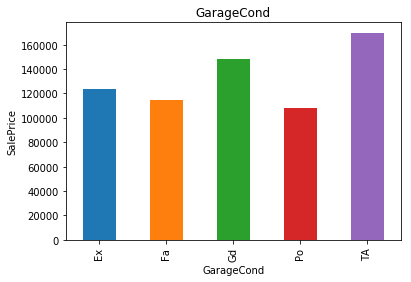

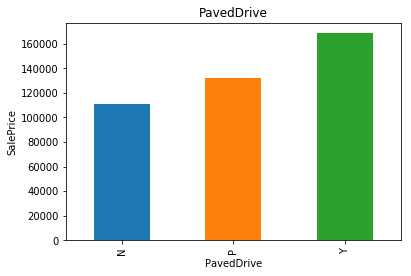

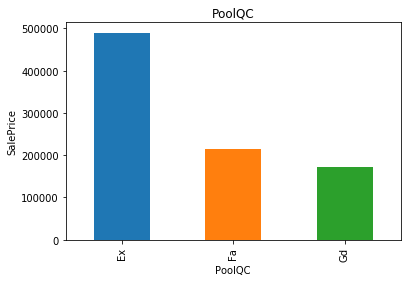

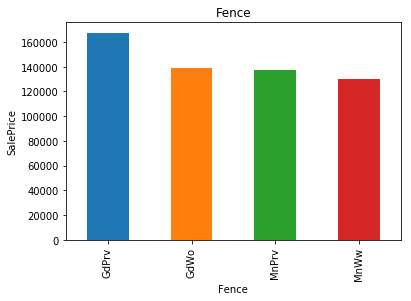

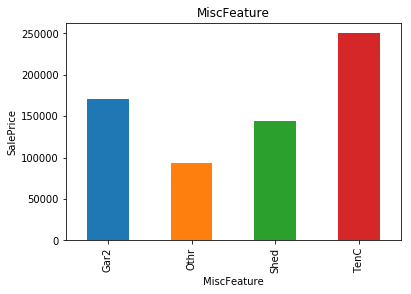

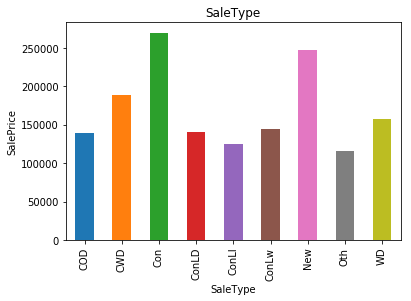

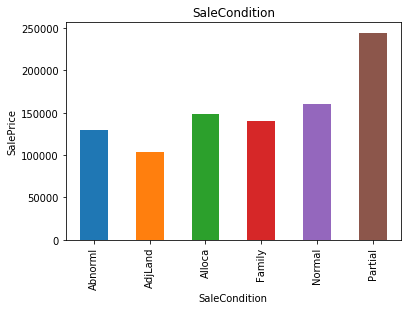

In [36]:
for feature in categorical_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

1. handling missing values
2. Handling temporal variables 
3. categorical features: removing/ replacing rare variables
4. Converting categorical features into numeric using feature encoding techniques
5. Standardize the values to same range

## Handling missing values

### Numerical Features 

In [48]:
numerical_features_nan = [feature for feature in numerical_features if dataset[feature].isnull().sum()]
for feature in numerical_features_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),"% missing values")

LotFrontage 0.1774 % missing values
MasVnrArea 0.0055 % missing values
GarageYrBlt 0.0555 % missing values


In [50]:
# Replacing missing values with median and adding an extra feature to check if values are successfully replaced.
for feature in numerical_features_nan:
    
    dataset[feature+'_nan'] = np.where(dataset[feature].isnull(), 1,0)
    
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())
    
dataset[numerical_features_nan].isnull().sum()
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Categorical Features

In [51]:
categorical_feature_nan = [feature for feature in categorical_feature if dataset[feature].isnull().sum()]
for feature in categorical_feature_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),"% missing values")

Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.0007 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


In [52]:
# Replacing missing values with new category(Missing) and adding an extra feature to check if values are successfully replaced.
for feature in categorical_feature_nan:
    
    dataset[feature+'_nan'] = np.where(dataset[feature].isnull(), 1,0)
    
    dataset[feature] = dataset[feature].fillna("Missing")
    
dataset[categorical_feature_nan].isnull().sum()
    

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [53]:
# Now we will handle the rare values (which occurs less than 1% of whole dataset)

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,Alley_nan,MasVnrType_nan,BsmtQual_nan,BsmtCond_nan,BsmtExposure_nan,BsmtFinType1_nan,BsmtFinType2_nan,Electrical_nan,FireplaceQu_nan,GarageType_nan,GarageFinish_nan,GarageQual_nan,GarageCond_nan,PoolQC_nan,Fence_nan,MiscFeature_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


## Handling Temporal Variables

In [60]:
# we performed this because these are discrete values with high magnitude hence we scaled them down to low magnitude

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    dataset[feature]= dataset['YrSold'] - dataset[feature]
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,Alley_nan,MasVnrType_nan,BsmtQual_nan,BsmtCond_nan,BsmtExposure_nan,BsmtFinType1_nan,BsmtFinType2_nan,Electrical_nan,FireplaceQu_nan,GarageType_nan,GarageFinish_nan,GarageQual_nan,GarageCond_nan,PoolQC_nan,Fence_nan,MiscFeature_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


## Handling Rare values in Categorical features( less than 1% values)

In [66]:
for feature in categorical_feature:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    rare_df = temp[temp<0.01].index
    dataset[feature] = np.where(dataset[feature].isin(rare_df),'RARE_VAR',dataset[feature])
    

Index(['C (all)'], dtype='object', name='MSZoning')
Index(['Grvl'], dtype='object', name='Street')
Index([], dtype='object', name='Alley')
Index(['IR3'], dtype='object', name='LotShape')
Index([], dtype='object', name='LandContour')
Index(['NoSeWa'], dtype='object', name='Utilities')
Index(['FR3'], dtype='object', name='LotConfig')
Index(['Sev'], dtype='object', name='LandSlope')
Index(['Blueste', 'NPkVill', 'Veenker'], dtype='object', name='Neighborhood')
Index(['PosA', 'RRAe', 'RRNe', 'RRNn'], dtype='object', name='Condition1')
Index(['Artery', 'Feedr', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'], dtype='object', name='Condition2')
Index([], dtype='object', name='BldgType')
Index(['1.5Unf', '2.5Fin', '2.5Unf'], dtype='object', name='HouseStyle')
Index(['Flat', 'Gambrel', 'Mansard', 'Shed'], dtype='object', name='RoofStyle')
Index(['ClyTile', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], dtype='object', name='RoofMatl')
Index(['AsphShn', 'BrkComm', 'CBlock', 'ImStucc', 'St

In [114]:
print(dataset.head(100))

     SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0     2.583824    0.537229      0.75     0.498699  0.442484     1.0    1.0   
1     2.573300    0.000000      0.75     0.575578  0.468672     1.0    1.0   
2     2.589054    0.537229      0.75     0.515737  0.500634     1.0    1.0   
3     2.553297    0.604426      0.75     0.468004  0.467609     1.0    1.0   
4     2.597433    0.537229      0.75     0.593092  0.547243     1.0    1.0   
5     2.554946    0.455358      0.75     0.597310  0.545262     1.0    1.0   
6     2.612611    0.000000      0.75     0.552095  0.478653     1.0    1.0   
7     2.580677    0.537229      0.75     0.521210  0.484533     1.0    1.0   
8     2.547453    0.455358      0.25     0.403756  0.374296     1.0    1.0   
9     2.539904    1.000000      0.75     0.395746  0.415357     1.0    1.0   
10    2.547212    0.000000      0.75     0.526584  0.499745     1.0    1.0   
11    2.621134    0.537229      0.75     0.597310  0.512200     

## Converting categorical features to numeric usning Encoding techniques 

In [72]:
# Here we are converting the cotegorical feature to numbers using ordinal target guided encoding tecnique, 
#which will assign ranks to the categories based on mean.

for feature in categorical_feature:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [73]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,Alley_nan,MasVnrType_nan,BsmtQual_nan,BsmtCond_nan,BsmtExposure_nan,BsmtFinType1_nan,BsmtFinType2_nan,Electrical_nan,FireplaceQu_nan,GarageType_nan,GarageFinish_nan,GarageQual_nan,GarageCond_nan,PoolQC_nan,Fence_nan,MiscFeature_nan
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,208500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,181500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,223500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,250000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


## Feature Scaling 

### Data distribution and transformation

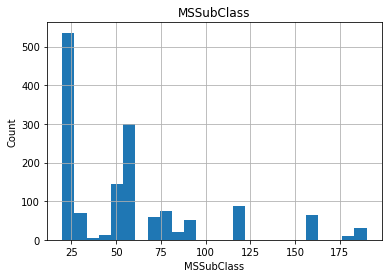

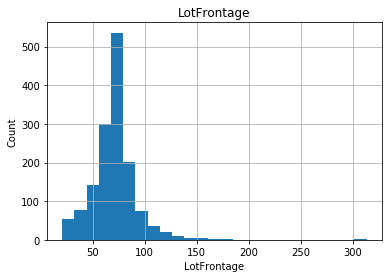

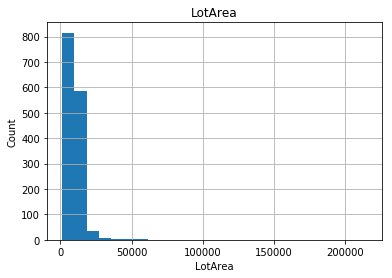

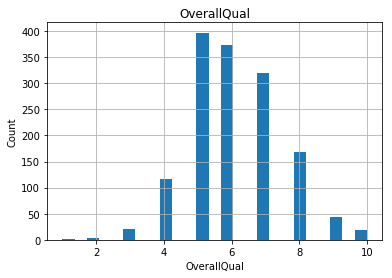

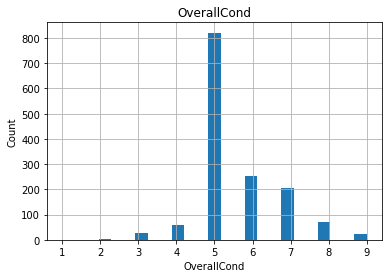

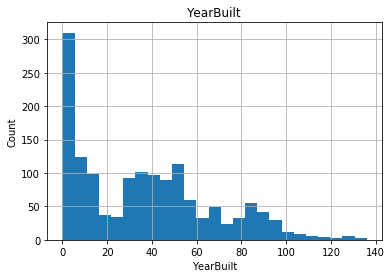

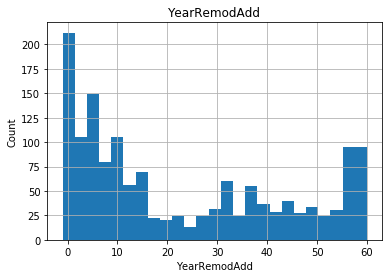

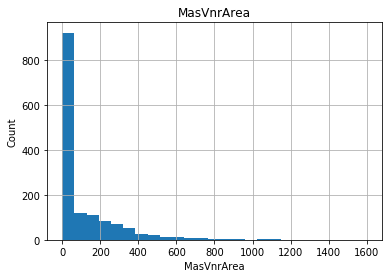

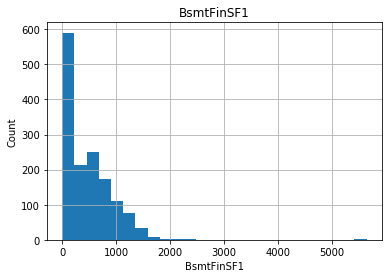

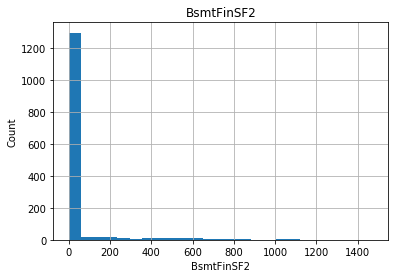

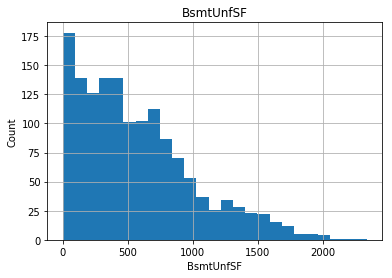

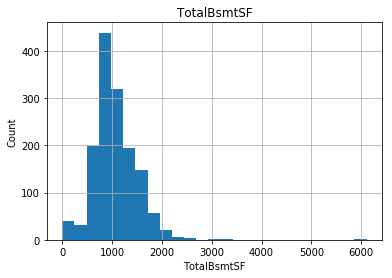

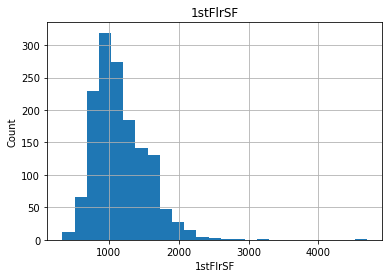

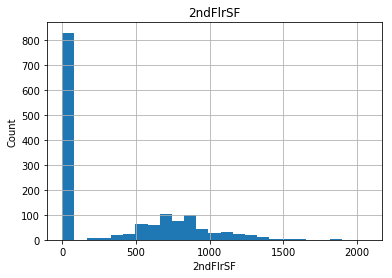

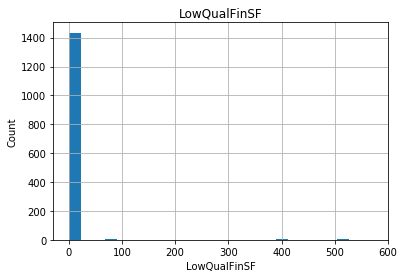

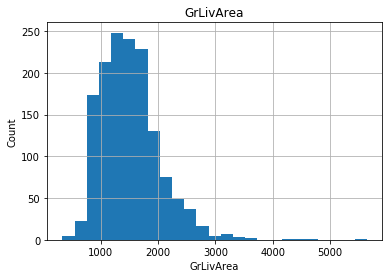

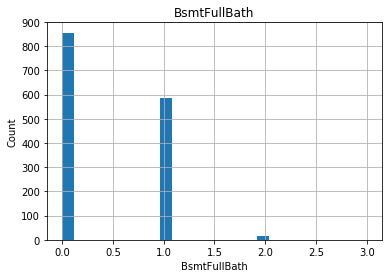

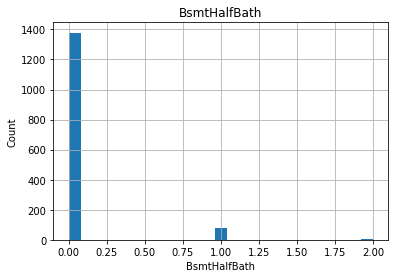

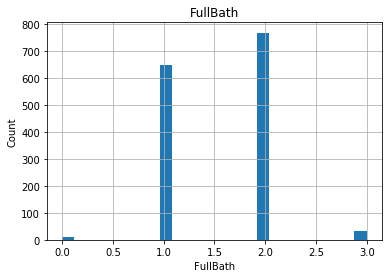

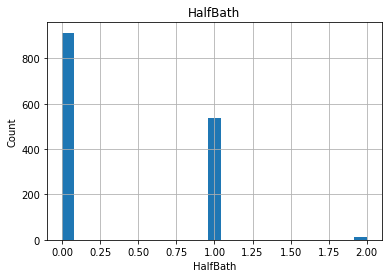

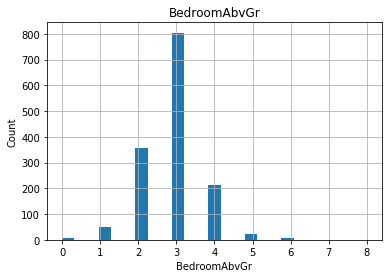

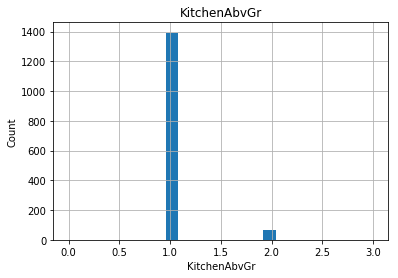

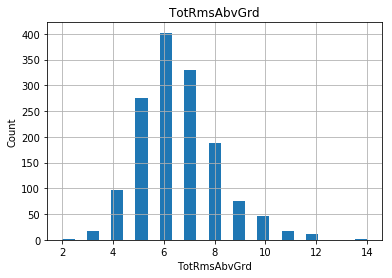

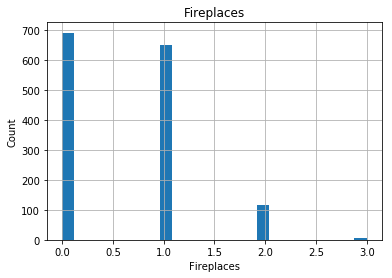

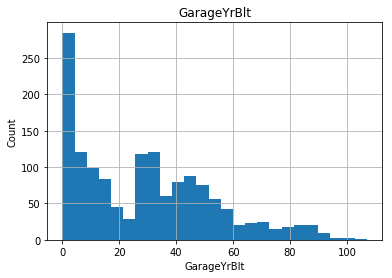

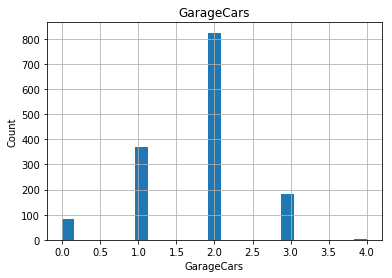

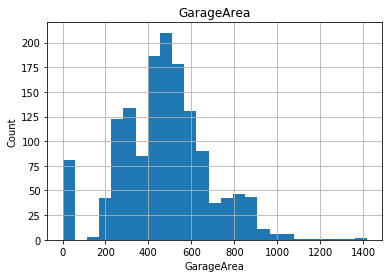

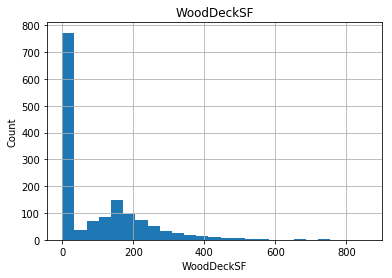

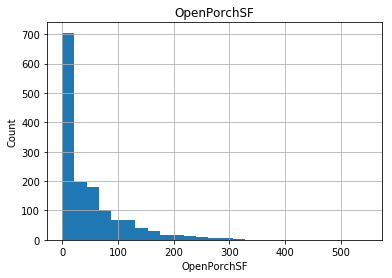

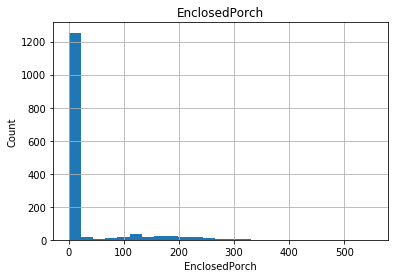

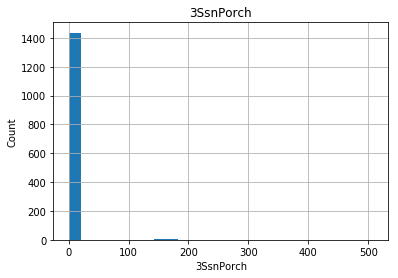

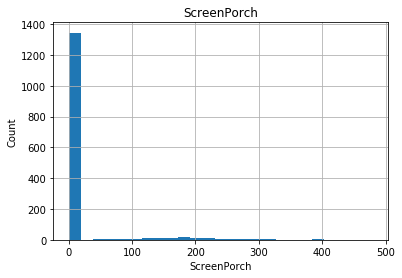

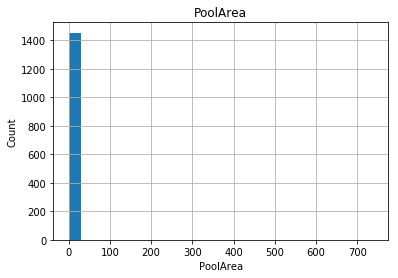

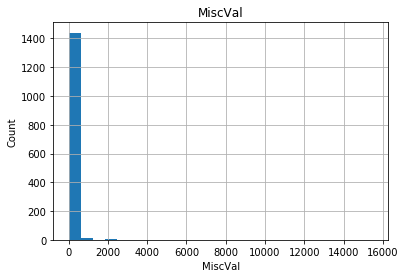

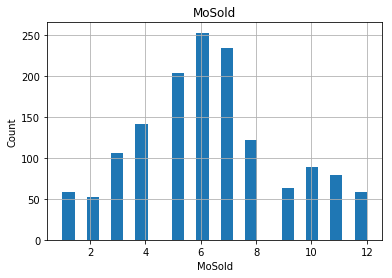

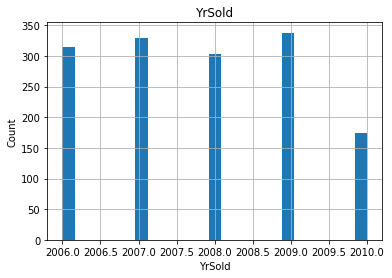

In [77]:
# Checking whether variables are normally distributed or not

for feature in numerical_features:
    if feature != 'Id' and feature!= 'SalePrice':
        dataset[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,31,31,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,7,6,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,91,36,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,8.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,8,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,250000


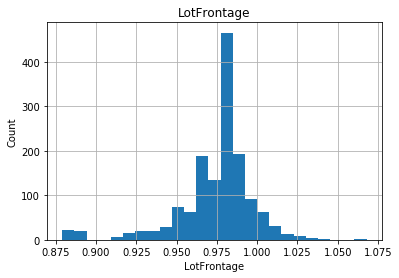

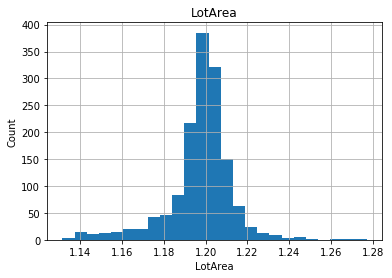

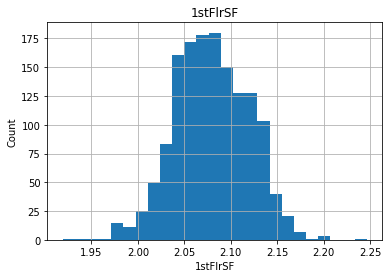

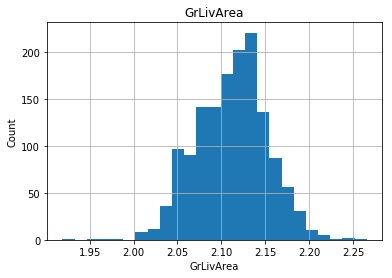

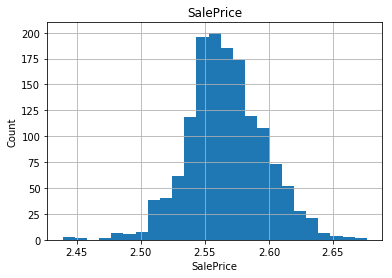

In [84]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
        # log 0 is undefined hence we used +1 to handle this situation
        #dataset[feature]=np.log(dataset[feature]+1)
        # This is alternative way of handling log 0 condition
        dataset[feature]=np.log1p(dataset[feature])
        dataset[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

### Standard Scaling on all features

In [92]:
feature_scale = [feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [93]:
scaler.transform(dataset[feature_scale])

array([[0.53722858, 0.75      , 0.49869937, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.75      , 0.57557826, ..., 1.        , 1.        ,
        1.        ],
       [0.53722858, 0.75      , 0.51573717, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.60442603, 0.75      , 0.50448563, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.51573717, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.75      , 0.55209543, ..., 1.        , 1.        ,
        1.        ]])

In [94]:
data= pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),
              pd.DataFrame(scaler.transform(dataset[feature_scale]),columns= feature_scale)], axis=1)

In [95]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,Alley_nan,MasVnrType_nan,BsmtQual_nan,BsmtCond_nan,BsmtExposure_nan,BsmtFinType1_nan,BsmtFinType2_nan,Electrical_nan,FireplaceQu_nan,GarageType_nan,GarageFinish_nan,GarageQual_nan,GarageCond_nan,PoolQC_nan,Fence_nan,MiscFeature_nan
0,1,2.583824,0.537229,0.75,0.498699,0.442484,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.858724,0.748497,0.577323,0.629331,0.0,0.0,0.9,0.9,0.50,0.716038,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.759508,0.833333,0.0,0.646838,0.774668,1.0,1.00,1.0,1.0,0.394409,0.884420,0.0,0.618794,0.5,0.00000,0.792481,0.63093,0.630930,0.5,0.666667,0.682606,1.0,0.0,0.2,0.8,0.382680,0.666667,0.682606,0.869159,0.666667,1.0,1.0,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.500249,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,2,2.573300,0.000000,0.75,0.575578,0.468672,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.795083,0.951472,0.841481,0.917286,0.0,0.0,0.1,0.2,0.25,0.000000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.797188,0.833333,0.0,0.728731,0.819153,1.0,1.00,1.0,1.0,0.543473,0.000000,0.0,0.513204,0.0,0.63093,0.792481,0.00000,0.630930,0.5,0.333333,0.526456,1.0,0.5,0.6,0.8,0.740205,0.666667,0.682606,0.845088,0.666667,1.0,1.0,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.586928,0.250187,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,3,2.589054,0.537229,0.75,0.515737,0.500634,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.858724,0.748497,0.632473,0.662276,0.0,0.0,0.9,0.9,0.50,0.690361,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.716357,0.833333,0.0,0.783246,0.782930,1.0,1.00,1.0,1.0,0.422648,0.886245,0.0,0.633599,0.5,0.00000,0.792481,0.63093,0.630930,0.5,0.666667,0.526456,1.0,0.5,0.6,0.8,0.444123,0.666667,0.682606,0.883450,0.666667,1.0,1.0,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.859833,0.500249,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,4,2.553297,0.604426,0.75,0.468004,0.467609,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.858724,0.748497,0.960845,0.936898,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.622780,0.833333,0.0,0.811361,0.760436,1.0,0.75,1.0,1.0,0.439600,0.868471,0.0,0.620188,0.5,0.00000,0.500000,0.00000,0.630930,0.5,0.666667,0.609423,1.0,0.5,0.8,0.4,0.469279,0.333333,0.861353,0.890935,0.666667,1.0,1.0,0.000000,0.568247,0.888227,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.000000,0.666667,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5,2.597433,0.537229,0.75,0.593092,0.547243,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.912610,0.748497,0.653580,0.712458,0.0,0.0,0.9,0.9,0.50,0.794318,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.750841,0.833333,0.0,0.798858,0.808002,1.0,1.00,1.0,1.0,0.506785,0.911832,0.0,0.703241,0.5,0.00000,0.792481,0.63093,0.732487,0.5,0.666667,0.748070,1.0,0.5,0.6,0.8,0.469279,0.666667,0.861353,0.927266,0.666667,1.0,1.0,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,

In [96]:
data.to_csv('X_train.csv',index=False)

In [112]:
dataset = pd.read_csv('X_train.csv')
dataset.head()
dataset.drop('Id', axis =1,inplace=True)
dataset.head()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.isnull().sum()

SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        1
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                   ..
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC              0
Fence               0
MiscFeature         0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
LotFrontage_nan     0
MasVnrArea_nan      0
GarageYrBlt_nan     0
Alley_nan 

In [105]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,Alley_nan,MasVnrType_nan,BsmtQual_nan,BsmtCond_nan,BsmtExposure_nan,BsmtFinType1_nan,BsmtFinType2_nan,Electrical_nan,FireplaceQu_nan,GarageType_nan,GarageFinish_nan,GarageQual_nan,GarageCond_nan,PoolQC_nan,Fence_nan,MiscFeature_nan
0,0.537229,0.75,0.498699,0.442484,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.858724,0.748497,0.577323,0.629331,0.0,0.0,0.9,0.9,0.50,0.716038,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.759508,0.833333,0.0,0.646838,0.774668,1.0,1.00,1.0,1.0,0.394409,0.884420,0.0,0.618794,0.5,0.00000,0.792481,0.63093,0.630930,0.5,0.666667,0.682606,1.0,0.0,0.2,0.8,0.382680,0.666667,0.682606,0.869159,0.666667,1.0,1.0,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.500249,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.000000,0.75,0.575578,0.468672,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.795083,0.951472,0.841481,0.917286,0.0,0.0,0.1,0.2,0.25,0.000000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.797188,0.833333,0.0,0.728731,0.819153,1.0,1.00,1.0,1.0,0.543473,0.000000,0.0,0.513204,0.0,0.63093,0.792481,0.00000,0.630930,0.5,0.333333,0.526456,1.0,0.5,0.6,0.8,0.740205,0.666667,0.682606,0.845088,0.666667,1.0,1.0,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.586928,0.250187,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.537229,0.75,0.515737,0.500634,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.858724,0.748497,0.632473,0.662276,0.0,0.0,0.9,0.9,0.50,0.690361,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.716357,0.833333,0.0,0.783246,0.782930,1.0,1.00,1.0,1.0,0.422648,0.886245,0.0,0.633599,0.5,0.00000,0.792481,0.63093,0.630930,0.5,0.666667,0.526456,1.0,0.5,0.6,0.8,0.444123,0.666667,0.682606,0.883450,0.666667,1.0,1.0,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.859833,0.500249,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.604426,0.75,0.468004,0.467609,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.858724,0.748497,0.960845,0.936898,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.622780,0.833333,0.0,0.811361,0.760436,1.0,0.75,1.0,1.0,0.439600,0.868471,0.0,0.620188,0.5,0.00000,0.500000,0.00000,0.630930,0.5,0.666667,0.609423,1.0,0.5,0.8,0.4,0.469279,0.333333,0.861353,0.890935,0.666667,1.0,1.0,0.000000,0.568247,0.888227,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.000000,0.666667,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.537229,0.75,0.593092,0.547243,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.912610,0.748497,0.653580,0.712458,0.0,0.0,0.9,0.9,0.50,0.794318,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.750841,0.833333,0.0,0.798858,0.808002,1.0,1.00,1.0,1.0,0.506785,0.911832,0.0,0.703241,0.5,0.00000,0.792481,0.63093,0.732487,0.5,0.666667,0.748070,1.0,0.5,0.6,0.8,0.469279,0.666667,0.861353,0.927266,0.666667,1.0,1.0,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.500249,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,

In [106]:
y.head()

0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').